In [1]:
import pandas as pd
from utils import myutils_analysis
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, precision_recall_fscore_support
import matplotlib.pyplot as plt

In [2]:
test_data = pd.read_csv("../data/gab_or_reddit_split/reddit_test_int_label.csv")
train_data = pd.read_csv("../data/train_int_label.csv")
labels = pd.read_csv("../label_preds/label_pred_singleMLM_reddit.csv")

In [3]:
category = 1
true_labels = test_data.label_vector
train_labels = train_data.label_vector
train_text = train_data.text
pred_labels = labels.prediction
text = test_data.text

In [4]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, text, category)

In [5]:
data_cleaned = myutils_analysis.get_data_cleaned(text)

In [6]:
# myutils_analysis.show_word_clouds_confusion_matrix(true_labels,pred_labels, data_cleaned, category)

In [7]:
#myutils_analysis.show_common_words_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20, category)

In [8]:
#myutils_analysis.show_common_bigrams_confusion_matrix(test_data.label_category, labels.prediction,data_cleaned,20,category)

In [9]:
wrongly_classified = myutils_analysis.get_wrongly_classified(true_labels,pred_labels,0,text)
wrongly_classified

{1: 6, 2: 10, 3: 38, 4: 13, 5: 12, 6: 7, 7: 73, 8: 11, 9: 4, 10: 11, 11: 20}

category: 0


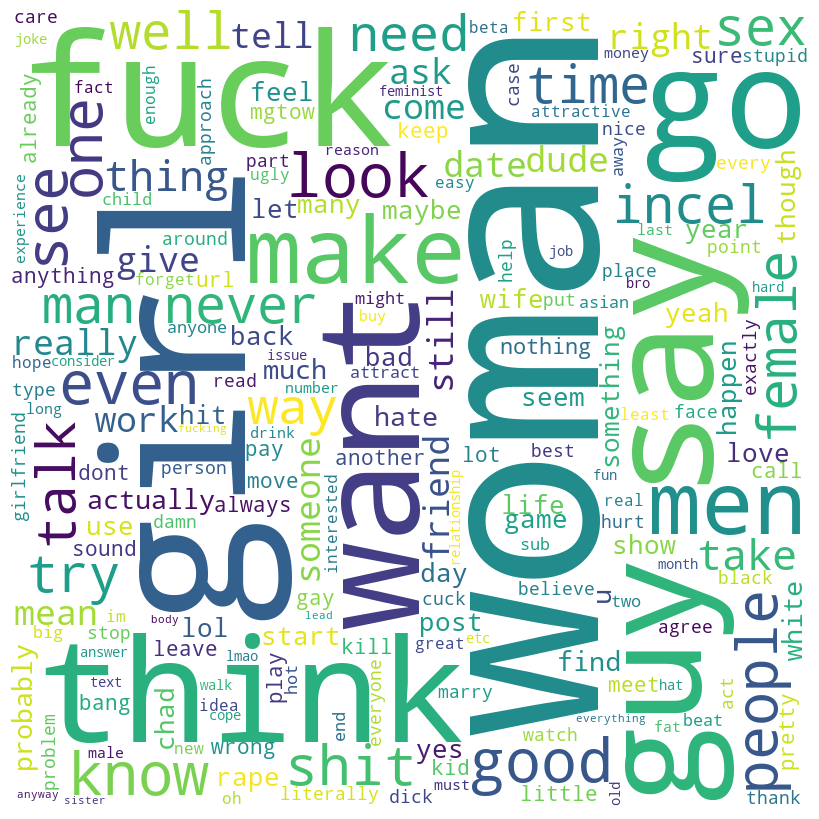

category: 1


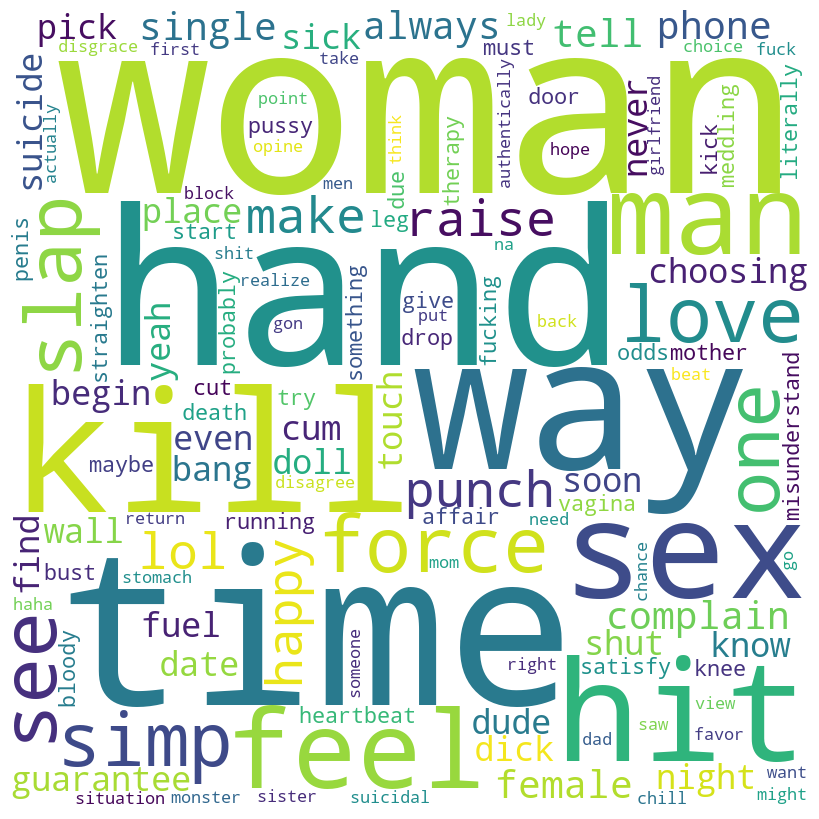

category: 2


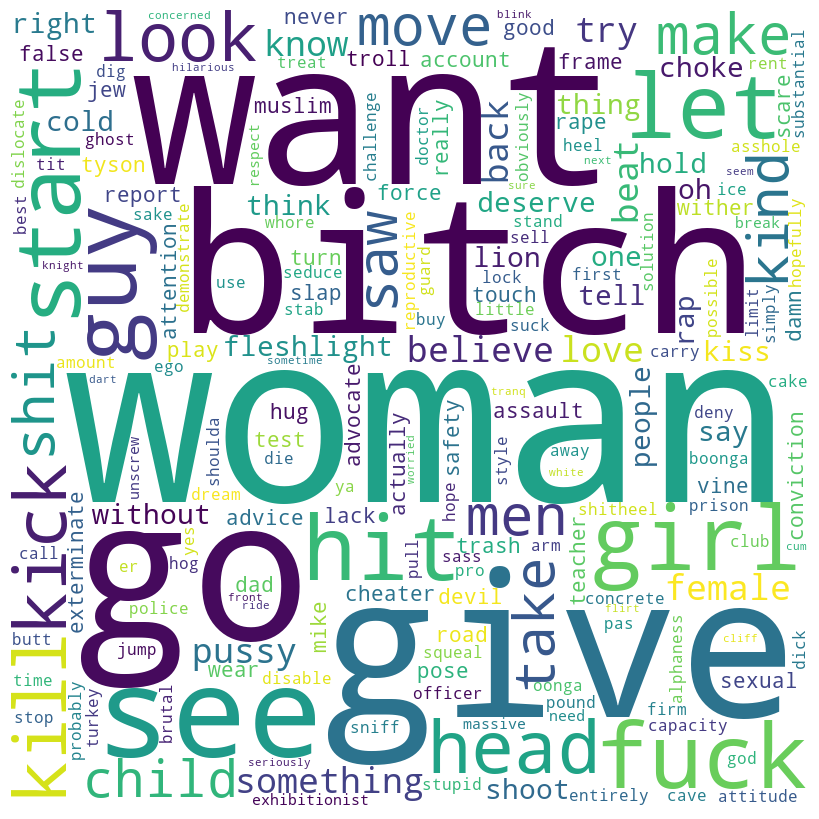

category: 3


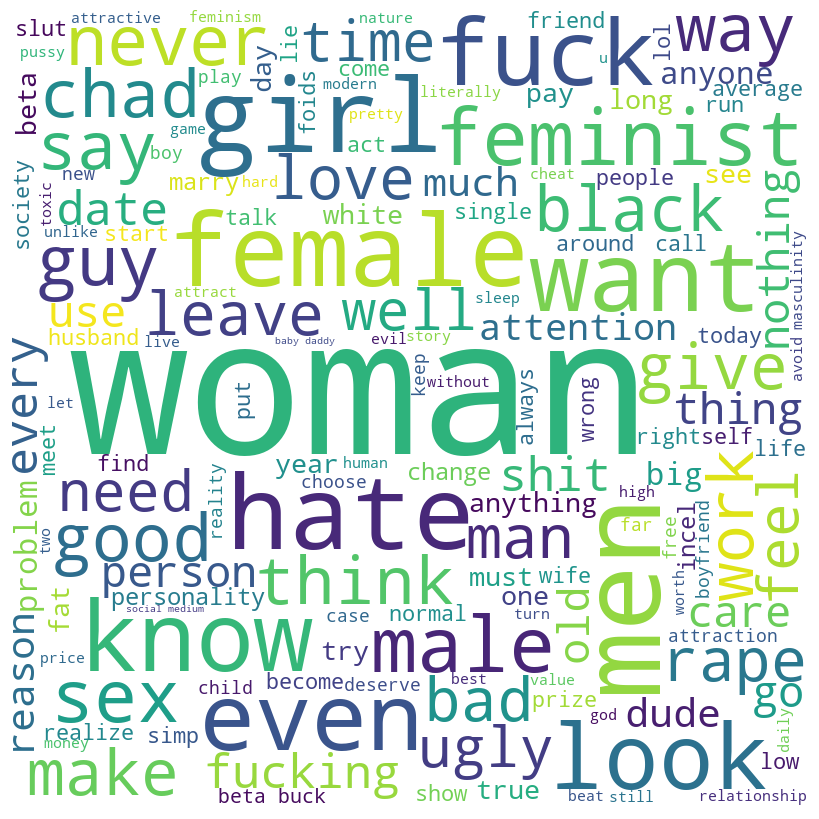

category: 4


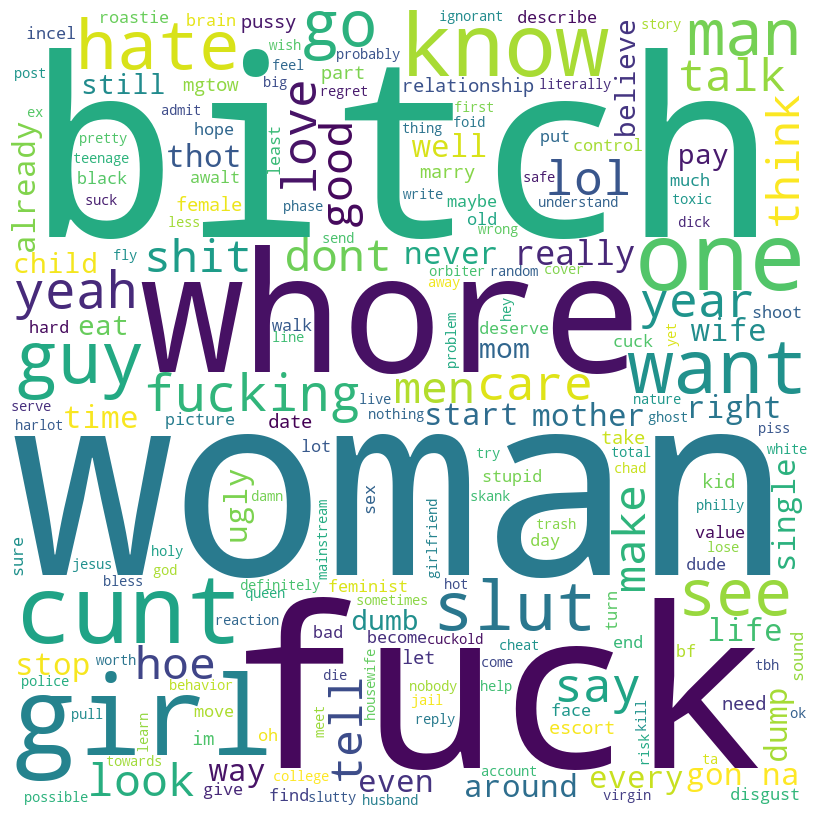

category: 5


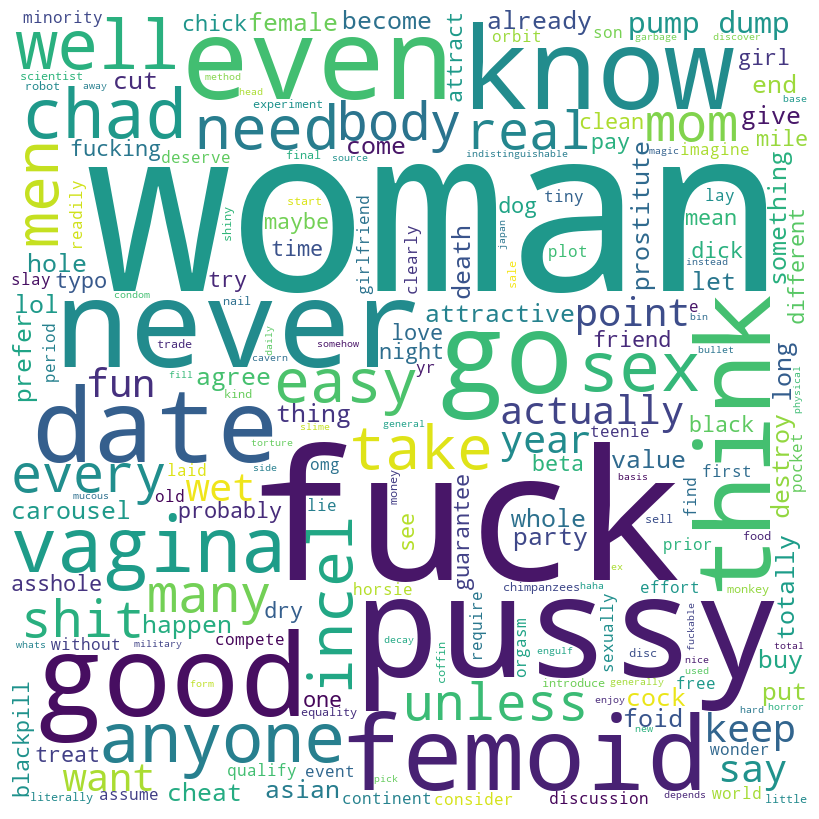

category: 6


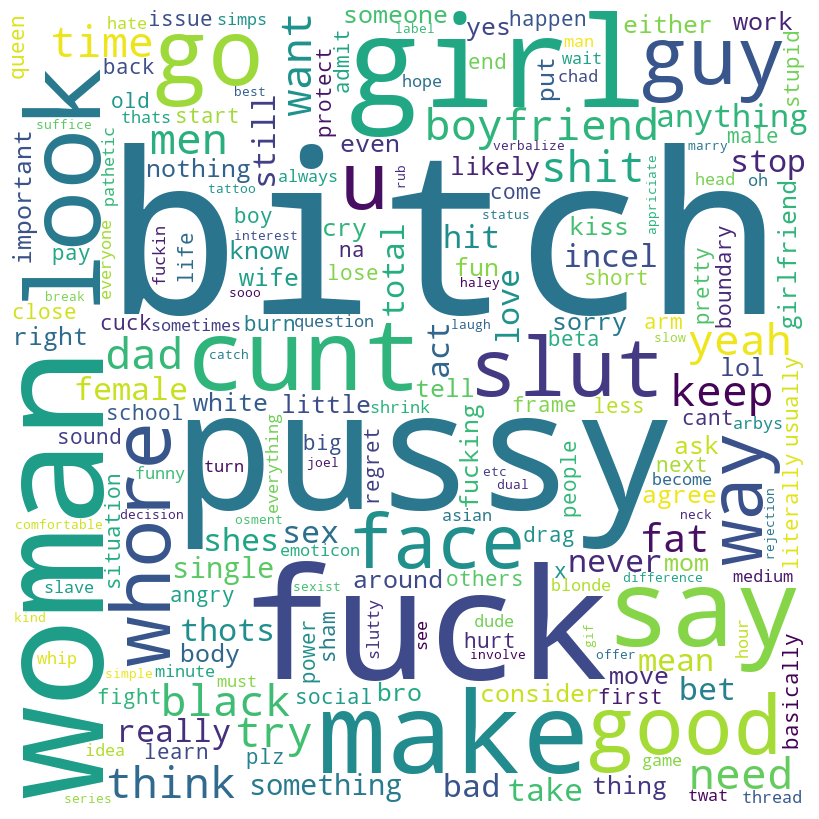

category: 7


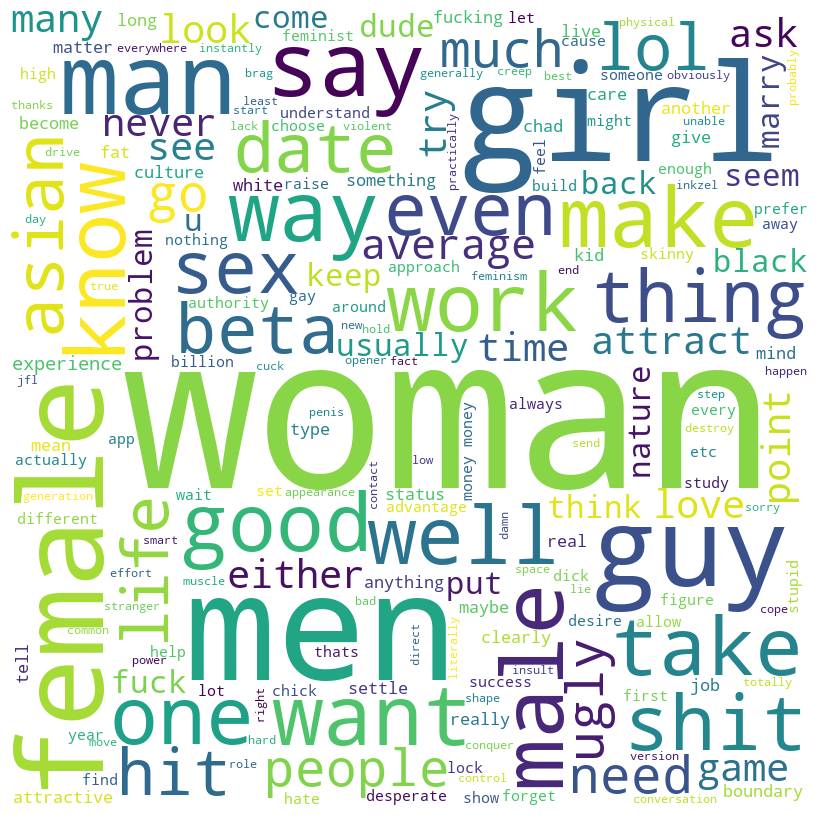

category: 8


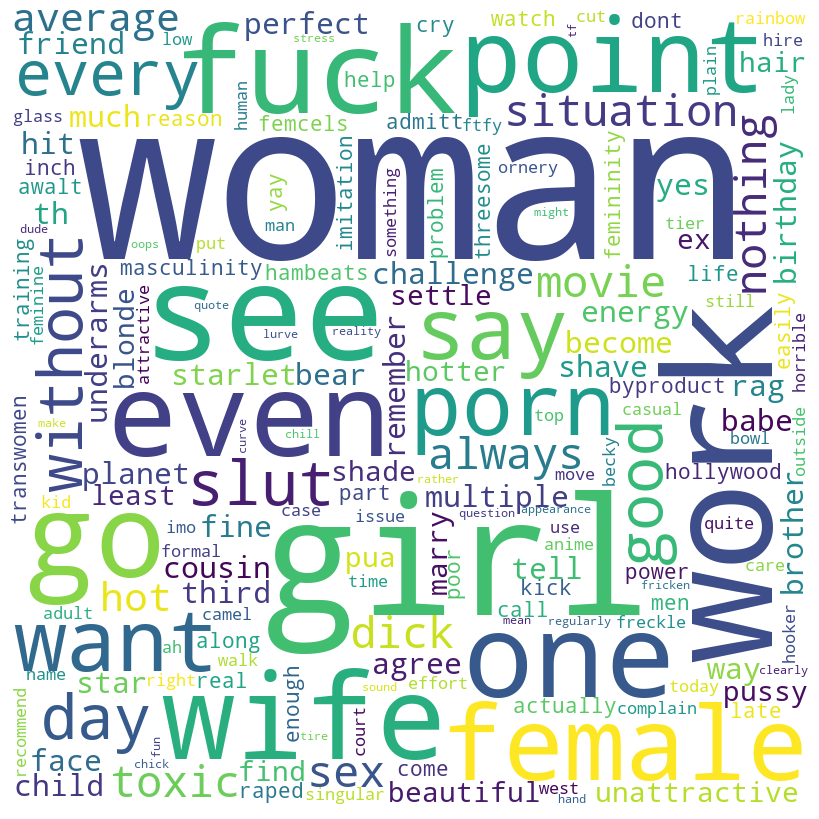

category: 9


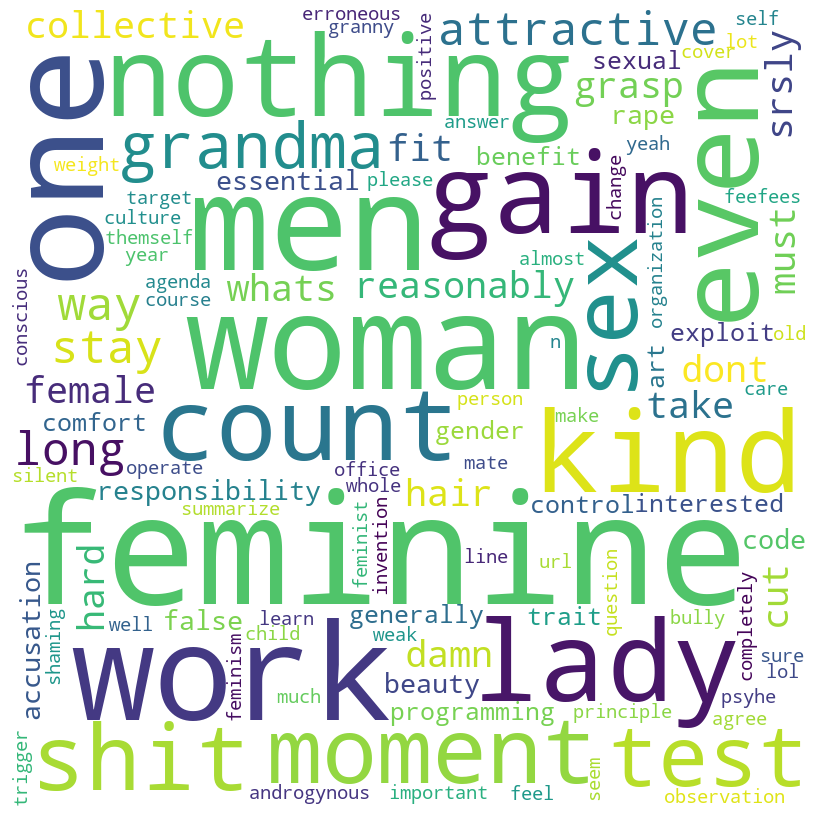

category: 10


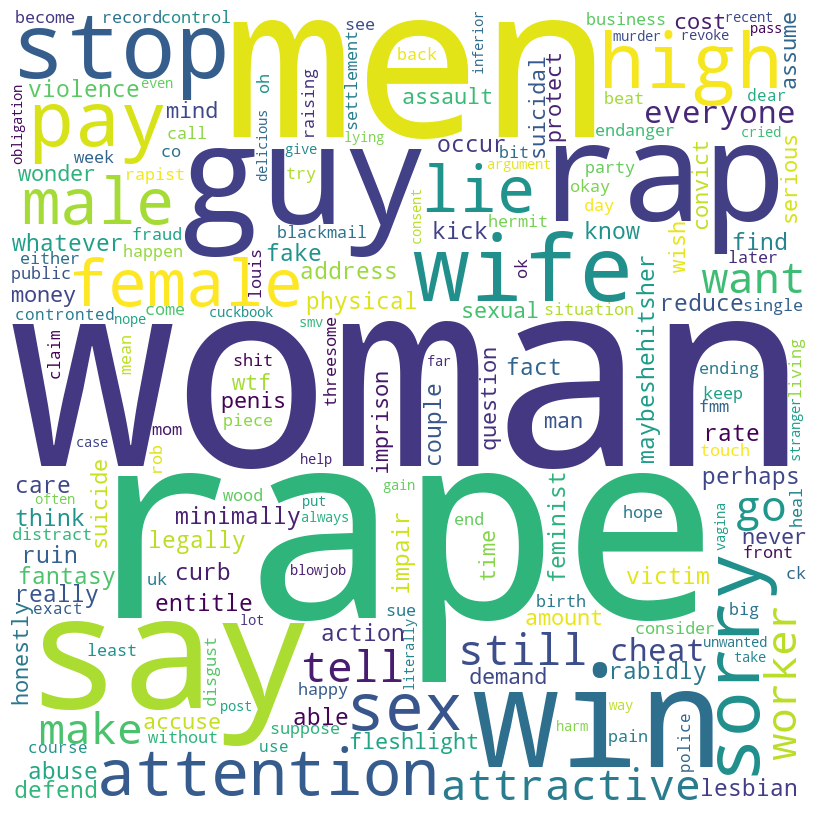

category: 11


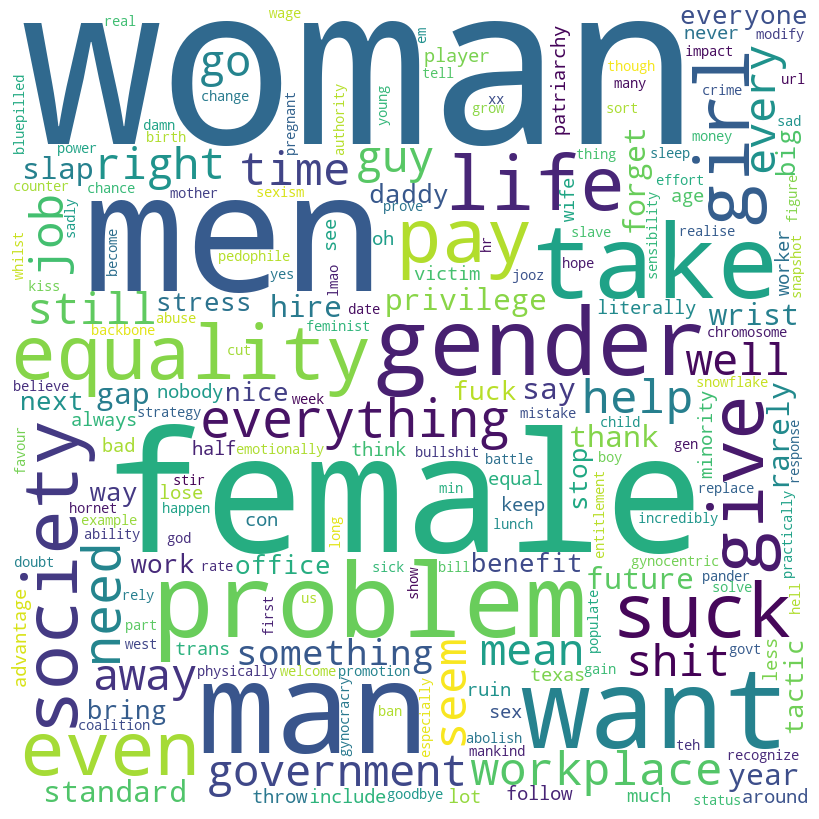

In [10]:
myutils_analysis.show_word_clouds_categories(true_labels, pred_labels,data_cleaned)

In [11]:
myutils_analysis.show_common_words_categories(true_labels, pred_labels, data_cleaned)

category: 0
In total there is 14541 words in the array
[('woman', 358), ('girl', 220), ('get', 215), ('like', 197), ('fuck', 138), ('say', 125), ('think', 117), ('want', 114), ('go', 110), ('make', 106), ('guy', 106), ('would', 104), ('men', 87), ('good', 80), ('look', 80), ('even', 78), ('know', 78), ('see', 76), ('one', 74), ('people', 74)]
category: 1
In total there is 167 words in the array
[('would', 7), ('woman', 4), ('hand', 3), ('get', 3), ('time', 3), ('way', 3), ('kill', 3), ('hit', 2), ('sex', 2), ('man', 2), ('like', 2), ('feel', 2), ('force', 2), ('see', 2), ('love', 2), ('slap', 2), ('simp', 2), ('one', 2), ('punch', 2), ('ever', 2)]
category: 2
In total there is 350 words in the array
[('woman', 6), ('get', 6), ('want', 4), ('give', 4), ('go', 4), ('like', 4), ('bitch', 4), ('see', 3), ('girl', 3), ('let', 3), ('fuck', 3), ('as', 3), ('start', 3), ('hit', 3), ('guy', 3), ('head', 3), ('kick', 3), ('kill', 3), ('look', 3), ('move', 2)]
category: 3
In total there is 2032 w

In [12]:
myutils_analysis.show_common_bigrams_categories(true_labels, pred_labels, data_cleaned)

category: 0
In total there is 13242 bigrams in the array
[(('sound', 'like'), 14), (('look', 'like'), 14), (('gon', 'na'), 12), (('woman', 'like'), 11), (('woman', 'get'), 9), (('girl', 'like'), 9), (('year', 'old'), 9), (('get', 'ta'), 8), (('seem', 'like'), 8), (('woman', 'want'), 8), (('hate', 'woman'), 7), (('walk', 'away'), 7), (('woman', 'sex'), 7), (('get', 'girl'), 7), (('men', 'woman'), 7), (('girl', 'want'), 7), (('act', 'like'), 7), (('get', 'lay'), 7), (('pretty', 'much'), 7), (('shit', 'like'), 6)]
category: 1
In total there is 153 bigrams in the array
[(('force', 'see'), 2), (('would', 'kill'), 2), (('raise', 'hand'), 2), (('tell', 'female'), 1), (('female', 'complain'), 1), (('complain', 'single'), 1), (('single', 'hand'), 1), (('hand', 'phone'), 1), (('phone', 'always'), 1), (('always', 'guarantee'), 1), (('guarantee', 'find'), 1), (('find', 'date'), 1), (('date', 'night'), 1), (('night', 'get'), 1), (('get', 'dude'), 1), (('dude', 'pick'), 1), (('pick', 'time'), 1), ((

In [13]:
print(classification_report(true_labels,pred_labels, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1378
           1       0.14      0.33      0.20         6
           2       0.45      0.50      0.48        30
           3       0.39      0.38      0.39       163
           4       0.46      0.47      0.47       102
           5       0.25      0.28      0.27        39
           6       0.64      0.66      0.65        96
           7       0.22      0.37      0.28        90
           8       0.00      0.00      0.00        10
           9       0.00      0.00      0.00        10
          10       0.05      0.08      0.06        13
          11       0.41      0.32      0.36        56

    accuracy                           0.72      1993
   macro avg       0.33      0.35      0.33      1993
weighted avg       0.74      0.72      0.73      1993



In [14]:
true_labels_pretty_names = myutils_analysis.get_category_name(true_labels)
pred_labels_pretty_names = myutils_analysis.get_category_name(pred_labels)
set_true_labels = set(true_labels_pretty_names)

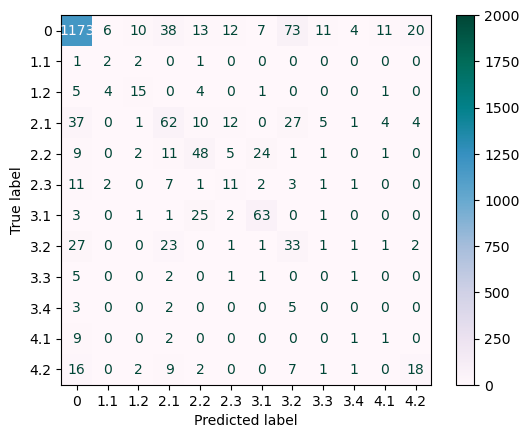

In [15]:
disp = ConfusionMatrixDisplay.from_predictions(true_labels_pretty_names, pred_labels_pretty_names, display_labels=sorted(set_true_labels),cmap='PuBuGn')
#disp.plot()
disp.ax_.get_images()[0].set_clim(0, 2000)
#plt.show()


In [16]:
pred_labels.value_counts().sort_index()

0     1299
1       14
2       33
3      157
4      104
5       44
6       99
7      149
8       21
9       10
10      19
11      44
Name: prediction, dtype: int64

In [17]:
def f1_score(true_labels, pred_labels):
    precision, recall, fbeta_score, support = precision_recall_fscore_support(true_labels, pred_labels,
                                                                             average='macro',
                                                                           zero_division=0.0)
    macro_f1 = (2 * precision * recall) / (precision + recall)
    print("macro f1: " + str(macro_f1))


In [18]:
f1_score(true_labels,pred_labels)

macro f1: 0.3397207744816105


In [19]:
true_labels_binary = myutils_analysis.set_to_one(true_labels)
pred_labels_binary = myutils_analysis.set_to_one(pred_labels)

In [20]:
true_labels_category = myutils_analysis.set_to_category(true_labels)
pred_labels_category = myutils_analysis.set_to_category(pred_labels)

In [21]:
print(classification_report(true_labels_binary, pred_labels_binary, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1378
           1       0.70      0.80      0.75       615

    accuracy                           0.83      1993
   macro avg       0.80      0.82      0.81      1993
weighted avg       0.84      0.83      0.84      1993



In [22]:
f1_score(true_labels_binary,pred_labels_binary)

macro f1: 0.813376902465359


In [23]:
print(classification_report(true_labels_category, pred_labels_category, zero_division=0))

              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1378
           1       0.49      0.64      0.55        36
           2       0.55      0.55      0.55       304
           3       0.38      0.52      0.44       206
           4       0.30      0.28      0.29        69

    accuracy                           0.75      1993
   macro avg       0.53      0.57      0.54      1993
weighted avg       0.77      0.75      0.76      1993



In [24]:
f1_score(true_labels_category,pred_labels_category)

macro f1: 0.54512296615453


In [25]:
train_cleaned = myutils_analysis.get_data_cleaned(train_text)

In [26]:
#myutils_analysis.show_word_clouds_categories_true(train_labels,train_cleaned)

In [27]:
myutils_analysis.show_common_words_categories_true(train_labels,train_cleaned, 10)

category: 0
In total there is 126332 words in the array
[('woman', 2642), ('url', 1552), ('get', 1454), ('like', 1297), ('girl', 1198), ('fuck', 953), ('say', 913), ('go', 848), ('user', 810), ('want', 727)]
category: 1
In total there is 689 words in the array
[('woman', 16), ('get', 13), ('want', 11), ('like', 10), ('as', 10), ('would', 10), ('bitch', 7), ('shit', 7), ('give', 6), ('punch', 6)]
category: 2
In total there is 2824 words in the array
[('woman', 66), ('get', 32), ('bitch', 28), ('would', 24), ('fuck', 24), ('say', 22), ('need', 21), ('like', 21), ('make', 20), ('go', 19)]
category: 3
In total there is 9767 words in the array
[('woman', 612), ('men', 138), ('get', 121), ('like', 89), ('female', 87), ('fuck', 84), ('girl', 77), ('want', 72), ('know', 63), ('go', 63)]
category: 4
In total there is 8308 words in the array
[('woman', 222), ('bitch', 199), ('fuck', 117), ('whore', 108), ('get', 99), ('like', 97), ('cunt', 58), ('know', 55), ('say', 54), ('url', 49)]
category: 5

In [28]:
text.str.len().mean()

126.71249372804817